In [4]:
from collections import namedtuple, defaultdict
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

<div class="alert alert-block alert-success"> 
    <h1> Papers.txt 📄 </h1>
</div>

- [reference-data-schema#papers](https://docs.microsoft.com/en-us/academic-services/graph/reference-data-schema#papers)

- Relative_path : `'../raw_dataset/Papers.txt'`

In [2]:
# Run this with one
Papers = namedtuple('Paper', ['PaperId', 'Rank', 'Doi', 'DocType','PaperTitle', 'OriginalTitle', 'BookTitle', 'Year', 'Date', 'OnlineDate', 'Publisher','JournalId', 'ConferenceSeriesId', 'ConferenceInstanceId','Volume', 'Issue', 'FirstPage', 'LastPage', 'ReferenceCount','CitationCount', 'EstimatedCitation', 'OriginalVenue', 'FamilyId','FamilyRank', 'DocSubTypes', 'CreatedDate'])

In [3]:
with open('../raw_dataset/Papers.txt') as f:
    for line in f:
        cols = tuple(line.split("\t"))
        paper = Papers(*cols)
        break
dict(paper._asdict())

{'PaperId': '248996',
 'Rank': '24829',
 'Doi': '',
 'DocType': 'Patent',
 'PaperTitle': 'synthesis of acrylamide from acrylonitrile',
 'OriginalTitle': 'Synthesis of acrylamide from acrylonitrile',
 'BookTitle': '',
 'Year': '1972',
 'Date': '1972-06-05',
 'OnlineDate': '',
 'Publisher': '',
 'JournalId': '',
 'ConferenceSeriesId': '',
 'ConferenceInstanceId': '',
 'Volume': '',
 'Issue': '',
 'FirstPage': '',
 'LastPage': '',
 'ReferenceCount': '0',
 'CitationCount': '4',
 'EstimatedCitation': '4',
 'OriginalVenue': '',
 'FamilyId': '',
 'FamilyRank': '',
 'DocSubTypes': '',
 'CreatedDate': '2016-06-24\n'}

<div class="alert alert-block alert-success"> 
    <h2> Statistics of Papers.txt 📊</h2>
</div>

- `time_taken` : $\texttt{27}$ mins 
- `total_count` : $\texttt{285429182}$
- `unique_paperids` : $\texttt{266988075}$
- `unique_ranks` : $\texttt{33223}$
- `journalid_count` : $\texttt{100959995} \Rightarrow \texttt{35.37} \%$
- `conferenceid_count` : $\texttt{5507559} \Rightarrow \texttt{1.93} \%$
- `avg_reference_count` : $\texttt{7.12}$
- `max_reference_count` : $\texttt{18848}$
- `avg_citation_count` : $\texttt{7.11}$
- `max_citation_count` : $\texttt{280098}$
- `unique_family_id` : $\texttt{7596797}$
- `unique_family_rank` : $\texttt{22548}$

In [102]:
total_count = 0
unique_paperids = set()
unique_ranks = set()
year_dict = defaultdict(int)
journalid_count = 0
conferenceid_count = 0
total_reference_count = 0
max_reference_count = 0
total_citation_count = 0
max_citation_count = 0
unique_family_id = set()
unique_family_rank = set()

start = time.time()
with open('../raw_dataset/Papers.txt') as f:
    for line in f:
        total_count += 1
        cols = line.split("\t")
        
        if cols[0] != '':
            # PaperId = int(cols[0])
            unique_paperids.add(int(cols[0]))
            
        if cols[1] != '':
            # Rank = int(cols[1])
            unique_ranks.add(int(cols[1]))
        
        if cols[7] != '':
            # Year = int(cols[7])
            year_dict[int(cols[7])] += 1
            
        if cols[11] != '':
            # JournalId = int(cols[11])
            journalid_count += 1
            
        if cols[12] != '':
            # ConferenceSeriesId = int(cols[12])
            conferenceid_count += 1
            
        if cols[18] != '':
            # ReferenceCount = int(cols[18])
            total_reference_count += int(cols[18])
            if int(cols[18]) > max_reference_count:
                max_reference_count = int(cols[18])
            
        if cols[19] != '':
            # CitationCount = int(cols[19])
            total_citation_count += int(cols[19])
            if int(cols[19]) > max_citation_count:
                max_citation_count = int(cols[19])
                
        if cols[22] != '':
            # FamilyId = int(cols[22])
            unique_family_id.add(int(cols[22]))
            
        if cols[23] != '':
            # FamilyRank = int(cols[23])
            unique_family_rank.add(int(cols[23]))
        
        #paper = Papers(*cols)
#dict(paper._asdict())
time.time() - start


1603.2522683143616

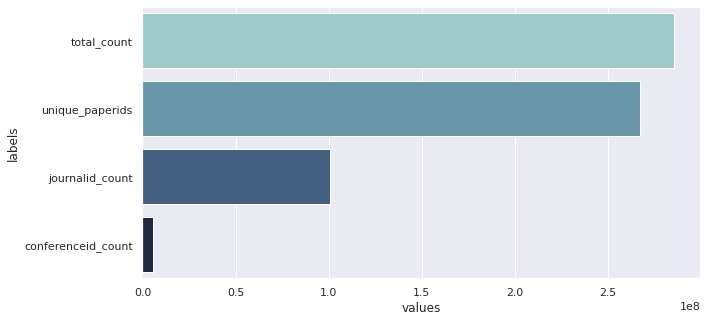

In [183]:
data = { 'labels' : ['total_count', 'unique_paperids', 'journalid_count', 'conferenceid_count'],
        'values'  : [285429182, 266988075, 100959995, 5507559]}
df = pd.DataFrame(data)
sns.set(style="darkgrid", rc = {'figure.figsize':(10,5)})
sns.barplot(
    y="labels", 
    x="values", 
    data=df, 
    palette="ch:rot=-.25,hue=1,light=.75");

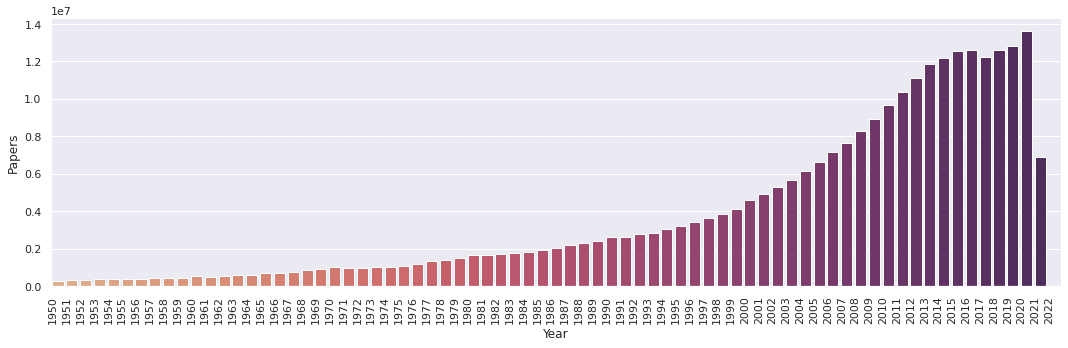

In [190]:
papers_by_year = pd.DataFrame(list(year_dict.items()), columns = ['Year', 'Papers'])
papers_by_year = papers_by_year[papers_by_year['Year'] >= 1950]
sns.set(style="darkgrid", rc = {'figure.figsize':(15,5)})
ax = sns.barplot(
    y="Papers", 
    x="Year", 
    data=papers_by_year, 
    palette="flare")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success"> 
    <h1> PaperAbstractsInvertedIndex.txt 📚 </h1>
</div>

- `time_taken` : $\texttt{27}$ mins 
- `total_count` : $\texttt{285429182}$

In [1]:
from os import listdir
from os.path import isfile, join
import ast
import time
from tqdm import tqdm

In [2]:
path = '../raw_dataset/nlp/'
files = [f for f in listdir(path) if (isfile(join(path, f)) and f.startswith('PaperAbstractsInvertedIndex.txt'))]

In [ ]:
start = time.time()
unique_paper_id_nodes = set()
for filename in files:
    with open(path+filename) as infile:
        for line in tqdm(infile):
            cols = line.split('\t')
            abstract = ast.literal_eval(cols[1])
            if abstract['IndexLength'] != 0:
                unique_paper_id_nodes.add(int(cols[0]))
time.time() - start

868467it [10:03, 1198.21it/s]

In [ ]:
len(unique_paper_id_nodes)

In [ ]:
unique_paper_id_nodes/285429182

<div class="alert alert-block alert-success"> 
    <h1> Semantic Scholar 🗂 </h1>
</div>

- `time_taken` : $\texttt{90}$ mins 
- `unique_semantic_scholar_mag_ids` : $\texttt{182710227}$
- `no_mag_id` : $\texttt{21811095}$
- `mag_id_and_fos` : $\texttt{157675969}$
- `fieldsOfStudy` : {'Art',
 'Biology',
 'Business',
 'Chemistry',
 'Computer Science',
 'Economics',
 'Engineering',
 'Environmental Science',
 'Geography',
 'Geology',
 'History',
 'Materials Science',
 'Mathematics',
 'Medicine',
 'Philosophy',
 'Physics',
 'Political Science',
 'Psychology',
 'Sociology'}
 
- `labels` = {'Art': 0,
 'Biology': 1,
 'Business': 2,
 'Chemistry': 3,
 'Computer Science': 4,
 'Economics': 5,
 'Engineering': 6,
 'Environmental Science': 7,
 'Geography': 8,
 'Geology': 9,
 'History': 10,
 'Materials Science': 11,
 'Mathematics': 12,
 'Medicine': 13,
 'Philosophy': 14,
 'Physics': 15,
 'Political Science': 16,
 'Psychology': 17,
 'Sociology': 18}

In [1]:
from os import listdir
from os.path import isfile, join
import json
import time
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
path = '../../../nvme1/semantic_scholar'
files = [f for f in listdir(path) if (isfile(join(path, f)) and f.startswith('s2-corpus'))]

In [ ]:
unique_semantic_scholar_mag_ids = set()
mag_id_and_fos = 0
fieldsOfStudy = set()

start = time.time()
for filename in tqdm(files):
    with open(join(path,filename)) as infile:
        for line in infile:
            abstract = json.loads(line)
            if abstract['magId'] != '':
                mag_id = int(abstract['magId'])
                if len(abstract['fieldsOfStudy']) != 0 and mag_id not in unique_semantic_scholar_mag_ids:
                    mag_id_and_fos += 1
                    for topic in abstract['fieldsOfStudy']:
                        fieldsOfStudy.add(topic)
                unique_semantic_scholar_mag_ids.add(mag_id)
time.time() - start

 62%|██████▏   | 3725/6000 [53:03<30:28,  1.24it/s]  

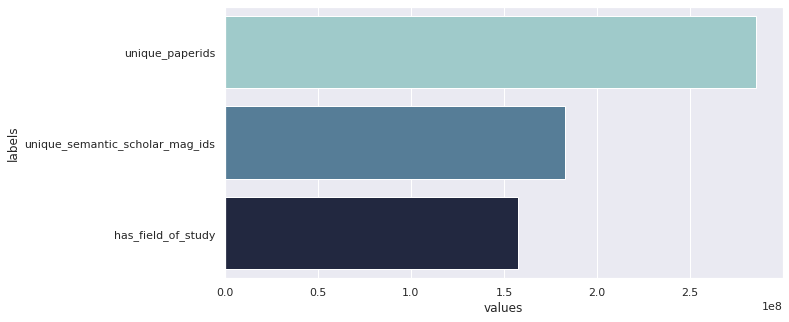

In [19]:
data = { 'labels' : ['unique_paperids', 'unique_semantic_scholar_mag_ids', 'has_field_of_study'],
        'values'  : [285429182, 182710227, 157675969]}
df = pd.DataFrame(data)
sns.set(style="darkgrid", rc = {'figure.figsize':(10,5)})
sns.barplot(
    y="labels", 
    x="values", 
    data=df, 
    palette="ch:rot=-.25,hue=1,light=.75");

In [3]:
temp = ['Art', 'Biology', 'Business', 'Chemistry', 'Computer Science', 'Economics', 'Engineering', 
          'Environmental Science', 'Geography', 'Geology', 'History', 'Materials Science', 'Mathematics', 
          'Medicine', 'Philosophy', 'Physics', 'Political Science', 'Psychology', 'Sociology']
labels = {val: key  for key, val in enumerate(temp)}

In [4]:
topic_co_occurence_matrix = [[0 for _ in range(len(temp))] for _ in range(len(temp))]
for filename in tqdm(files):
    with open(join(path,filename)) as infile:
        for line in infile:
            abstract = json.loads(line)
            if abstract['magId'] != '':
                mag_id = int(abstract['magId'])
                if len(abstract['fieldsOfStudy']) >= 2:
                    #print(abstract['fieldsOfStudy'])
                    for i in range(len(abstract['fieldsOfStudy'])):
                        for j in range(i+1, len(abstract['fieldsOfStudy'])):
                            topic_co_occurence_matrix[labels[abstract['fieldsOfStudy']\
                                                             [i]]][labels[abstract['fieldsOfStudy'][j]]] += 1

100%|██████████| 6000/6000 [1:16:51<00:00,  1.30it/s]


In [5]:
x_axis_labels = temp
y_axis_labels = temp

<AxesSubplot:>

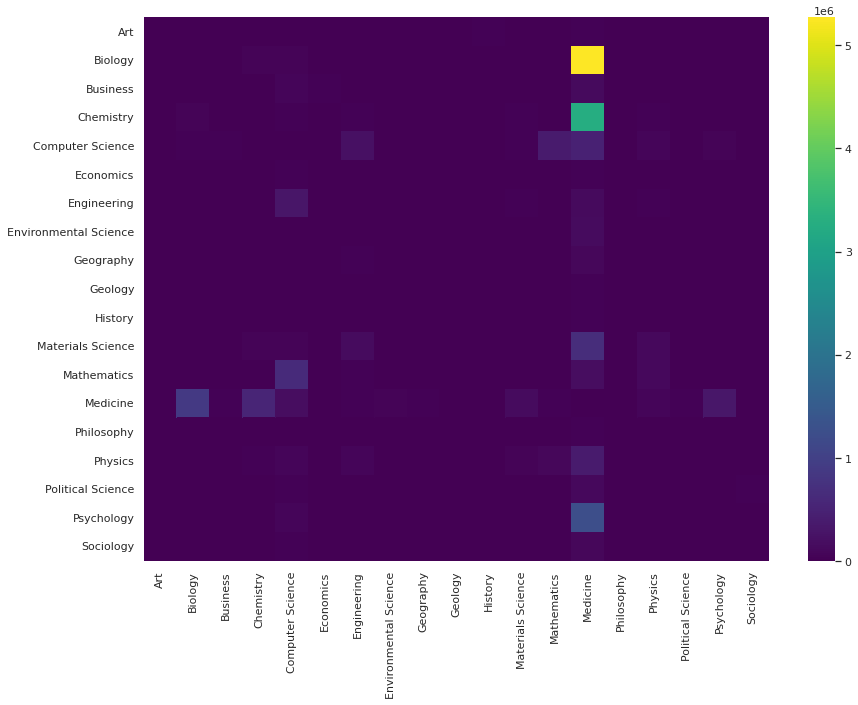

In [9]:
sns.set( rc = {'figure.figsize':(14,10)})
sns.heatmap(np.array(topic_co_occurence_matrix), xticklabels=x_axis_labels, yticklabels=y_axis_labels, cmap="viridis")

<div class="alert alert-block alert-success"> 
    <h1> PaperReferences.txt 📬 </h1>
</div>

- `time_taken` : $\texttt{5}$ mins 
- `total_count` : $\texttt{1,900,288,267}$

In [ ]:
start = time.time()
count = 0
with open('../raw_dataset/PaperReferences.txt') as file:
    for line in file:
        count += 1
time.time() - start